In [2]:
import pandas as pd

# Load the spreadsheet to check its content
file_path = 'IMCRound3Data.xlsx'
price_sheet = pd.read_excel(file_path, sheet_name=None)
prices_day_0 = price_sheet['prices_round_3_day_0']
prices_day_1 = price_sheet['prices_round_3_day_1']
prices_day_2 = price_sheet['prices_round_3_day_2']

relevant_products_day_0 = prices_day_0[prices_day_0['product'].isin(['STRAWBERRIES', 'CHOCOLATE', 'ROSES', 'GIFT_BASKET'])]
pivot_table_day_0 = relevant_products_day_0.pivot_table(index=['day', 'timestamp'], columns='product', values='mid_price', aggfunc='mean')
pivot_table_day_0['calculated_price'] = (pivot_table_day_0['STRAWBERRIES'] * 6) + (pivot_table_day_0['CHOCOLATE'] * 4) + (pivot_table_day_0['ROSES'] * 1)
pivot_table_day_0['premium'] = pivot_table_day_0['GIFT_BASKET'] - pivot_table_day_0['calculated_price']
print("DAY 0: ", pivot_table_day_0['premium'].describe())

relevant_products_day_1 = prices_day_1[prices_day_1['product'].isin(['STRAWBERRIES', 'CHOCOLATE', 'ROSES', 'GIFT_BASKET'])]
pivot_table_day_1 = relevant_products_day_1.pivot_table(index=['day', 'timestamp'], columns='product', values='mid_price', aggfunc='mean')
pivot_table_day_1['calculated_price'] = (pivot_table_day_1['STRAWBERRIES'] * 6) + (pivot_table_day_1['CHOCOLATE'] * 4) + (pivot_table_day_1['ROSES'] * 1)
pivot_table_day_1['premium'] = pivot_table_day_1['GIFT_BASKET'] - pivot_table_day_1['calculated_price']
print("DAY 1: ", pivot_table_day_1['premium'].describe())

relevant_products_day_2 = prices_day_2[prices_day_2['product'].isin(['STRAWBERRIES', 'CHOCOLATE', 'ROSES', 'GIFT_BASKET'])]
pivot_table_day_2 = relevant_products_day_2.pivot_table(index=['day', 'timestamp'], columns='product', values='mid_price', aggfunc='mean')
pivot_table_day_2['calculated_price'] = (pivot_table_day_2['STRAWBERRIES'] * 6) + (pivot_table_day_2['CHOCOLATE'] * 4) + (pivot_table_day_2['ROSES'] * 1)
pivot_table_day_2['premium'] = pivot_table_day_2['GIFT_BASKET'] - pivot_table_day_2['calculated_price']
print("DAY 2: ", pivot_table_day_2['premium'].describe())


DAY 0:  count    10000.000000
mean       370.230600
std         85.293178
min        140.000000
25%        310.000000
50%        379.500000
75%        433.000000
max        562.000000
Name: premium, dtype: float64
DAY 1:  count    10000.000000
mean       381.941800
std         65.750569
min        184.000000
25%        337.500000
50%        380.000000
75%        419.000000
max        632.000000
Name: premium, dtype: float64
DAY 2:  count    10000.000000
mean       386.299050
std         76.072587
min        185.000000
25%        332.000000
50%        383.000000
75%        438.500000
max        570.500000
Name: premium, dtype: float64


In [3]:
print("DAY 0 Average Premium: ", pivot_table_day_0['premium'].mean())
print("DAY 1 Average Premium: ", pivot_table_day_1['premium'].mean())
print("DAY 2 Average Premium: ", pivot_table_day_2['premium'].mean())
print("Total Average Premium: ", (pivot_table_day_0['premium'].mean() + pivot_table_day_1['premium'].mean() + pivot_table_day_2['premium'].mean()) / 3)

DAY 0 Average Premium:  370.2306
DAY 1 Average Premium:  381.9418
DAY 2 Average Premium:  386.29905
Total Average Premium:  379.4904833333333


In [4]:
# Load all sheets to understand their structure and relevance
sheets = pd.read_excel(file_path, sheet_name=None)

# Display the names of all sheets and the first few rows of each
sheet_names = sheets.keys()
{sheet_name: sheets[sheet_name].head() for sheet_name in sheet_names}


{'prices_round_3_day_0':    day  timestamp       product  bid_price_1  bid_volume_1  bid_price_2  \
 0    0          0     CHOCOLATE         7999           111          NaN   
 1    0          0  STRAWBERRIES         3999           210          NaN   
 2    0          0         ROSES        14999            72          NaN   
 3    0          0   GIFT_BASKET        71348            19      71347.0   
 4    0        100   GIFT_BASKET        71344             1      71343.0   
 
    bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
 0           NaN          NaN           NaN         8001           111   
 1           NaN          NaN           NaN         4001           210   
 2           NaN          NaN           NaN        15001            72   
 3          24.0          NaN           NaN        71362            19   
 4          12.0      71342.0          20.0        71355             1   
 
    ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
 

In [63]:
# Combine the price data from the three sheets into one DataFrame
prices_day_0 = sheets['prices_round_3_day_0']
prices_day_1 = sheets['prices_round_3_day_1']
prices_day_2 = sheets['prices_round_3_day_2']

# Concatenate the data from different days
combined_prices = pd.concat([prices_day_0, prices_day_1, prices_day_2])

# Filter for relevant products and calculate combined item price at each timestamp
relevant_products = combined_prices[combined_prices['product'].isin(['STRAWBERRIES', 'CHOCOLATE', 'ROSES', 'GIFT_BASKET'])]
# Update the pivot table to use 'ask_price_1' for gift baskets and 'bid_price_1' for other products
pivot_table = relevant_products.pivot_table(index=['day', 'timestamp'], columns='product', values=['ask_price_1', 'bid_price_1'], aggfunc='mean')

# Isolating the specific prices
pivot_table.columns = [f"{x}_{y}" for x, y in pivot_table.columns]  # Flatten MultiIndex for easier access
pivot_table['calculated_price'] = (pivot_table['ask_price_1_STRAWBERRIES'] * 6) + \
                                  (pivot_table['ask_price_1_CHOCOLATE'] * 4) + \
                                  (pivot_table['ask_price_1_ROSES'] * 1)
pivot_table['GIFT_BASKET'] = pivot_table['bid_price_1_GIFT_BASKET']
pivot_table['STRAWBERRIES'] = pivot_table['ask_price_1_STRAWBERRIES']
pivot_table['CHOCOLATE'] = pivot_table['ask_price_1_CHOCOLATE']
pivot_table['ROSES'] = pivot_table['ask_price_1_ROSES']


# Filter only necessary columns for plotting
plot_data = pivot_table[['GIFT_BASKET', 'calculated_price', 'STRAWBERRIES', 'CHOCOLATE', 'ROSES']]
plot_data.reset_index(inplace=True)

plot_data.head()


,day,timestamp,GIFT_BASKET,calculated_price,STRAWBERRIES,CHOCOLATE,ROSES
0,0,0,71348,71011,4001,8001,15001
1,0,100,71344,71009,4000,8002,15001
2,0,200,71344,71009,4000,8002,15001
3,0,300,71345,71013,4000,8003,15001
4,0,400,71336,71010,4000,8003,14998


/var/folders/mn/5d4xhd512lqgmxd3kg1brr0h0000gn/T/ipykernel_11457/290291394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['adjusted_continuous_timestamp'] = plot_data['timestamp'] + (plot_data['day'] * 1e6)


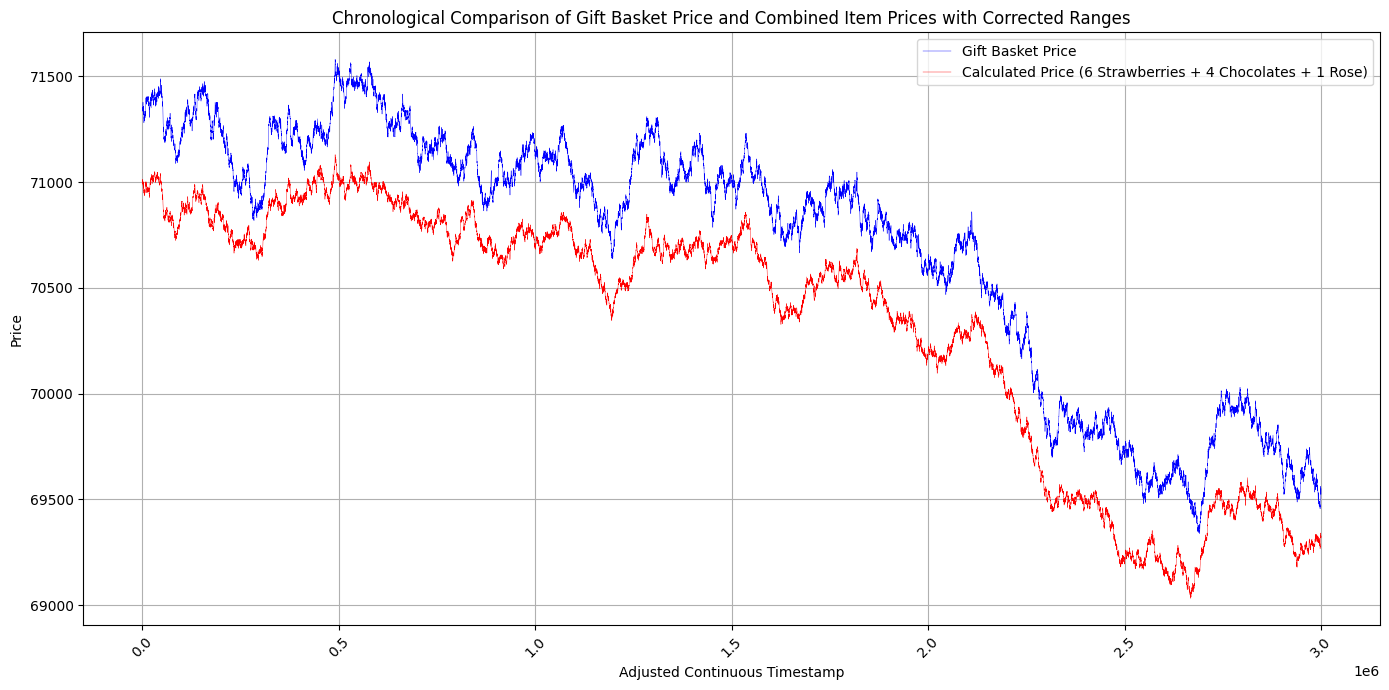

In [64]:
import matplotlib.pyplot as plt

# Adjusting the continuous timestamp calculation for proper range
plot_data['adjusted_continuous_timestamp'] = plot_data['timestamp'] + (plot_data['day'] * 1e6)

# Replotting the data with the adjusted continuous timestamps
plt.figure(figsize=(14, 7))
plt.plot(plot_data['adjusted_continuous_timestamp'], plot_data['GIFT_BASKET'], label='Gift Basket Price', color='blue', linewidth=0.3)
plt.plot(plot_data['adjusted_continuous_timestamp'], plot_data['calculated_price'], label='Calculated Price (6 Strawberries + 4 Chocolates + 1 Rose)', color='red', linewidth=0.3)

plt.title('Chronological Comparison of Gift Basket Price and Combined Item Prices with Corrected Ranges')
plt.xlabel('Adjusted Continuous Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



/var/folders/mn/5d4xhd512lqgmxd3kg1brr0h0000gn/T/ipykernel_11457/2568652180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['adjusted_continuous_timestamp'] = plot_data['timestamp'] + (plot_data['day'] * 1e6)


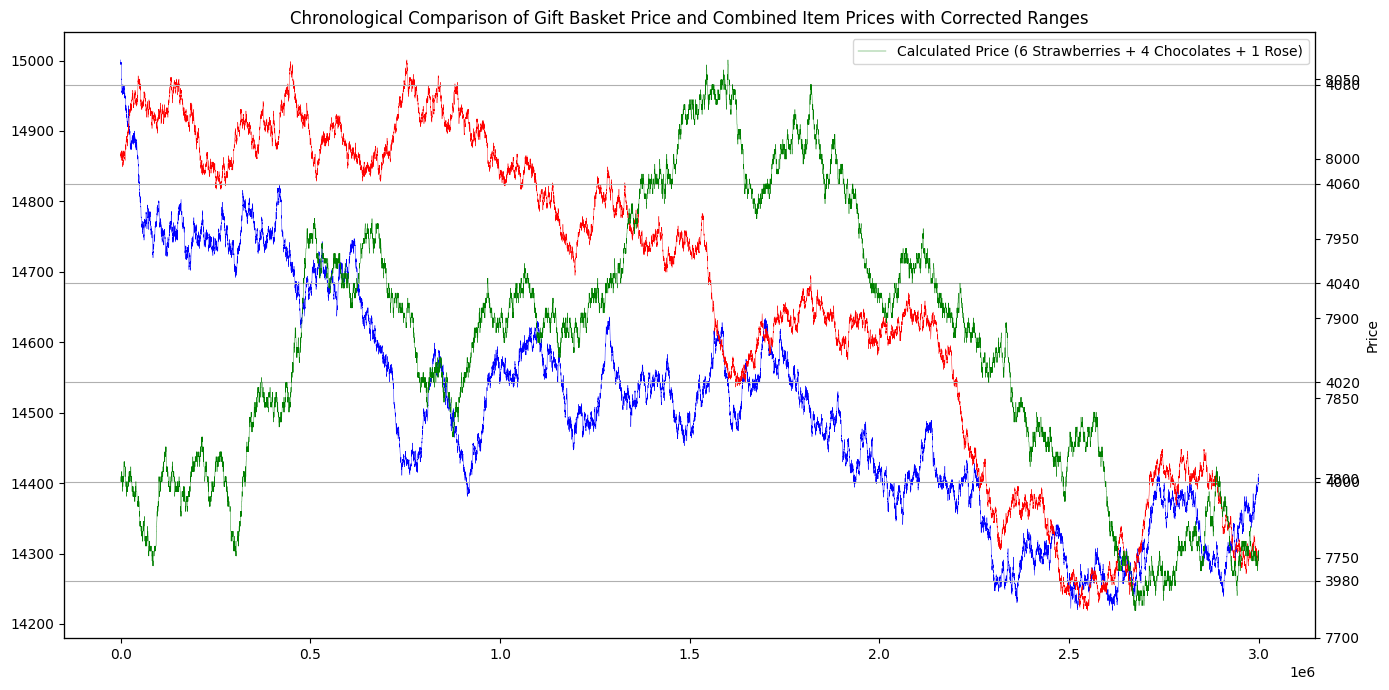

In [67]:
# Adjusting the continuous timestamp calculation for proper range
plot_data['adjusted_continuous_timestamp'] = plot_data['timestamp'] + (plot_data['day'] * 1e6)

# Replotting the data with the adjusted continuous timestamps
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax1.plot(plot_data['adjusted_continuous_timestamp'], plot_data['ROSES'], label='Gift Basket Price', color='blue', linewidth=0.3)
ax2.plot(plot_data['adjusted_continuous_timestamp'], plot_data['CHOCOLATE'], label='Calculated Price (6 Strawberries + 4 Chocolates + 1 Rose)', color='red', linewidth=0.3)
ax3.plot(plot_data['adjusted_continuous_timestamp'], plot_data['STRAWBERRIES'], label='Calculated Price (6 Strawberries + 4 Chocolates + 1 Rose)', color='green', linewidth=0.3)

plt.title('Chronological Comparison of Gift Basket Price and Combined Item Prices with Corrected Ranges')
plt.xlabel('Adjusted Continuous Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

There seems to be a premium on gift baskets, how much?

In [7]:
# Calculate the premium as the difference between the gift basket price and the calculated price of individual items
plot_data['premium'] = plot_data['GIFT_BASKET'] - plot_data['calculated_price']

# Provide summary statistics of the premium
premium_summary = plot_data['premium'].describe()
premium_summary


/var/folders/mn/5d4xhd512lqgmxd3kg1brr0h0000gn/T/ipykernel_11457/312819481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['premium'] = plot_data['GIFT_BASKET'] - plot_data['calculated_price']


count    30000.000000
mean       366.475467
std         76.474575
min        128.000000
25%        316.000000
50%        368.000000
75%        417.000000
max        617.000000
Name: premium, dtype: float64

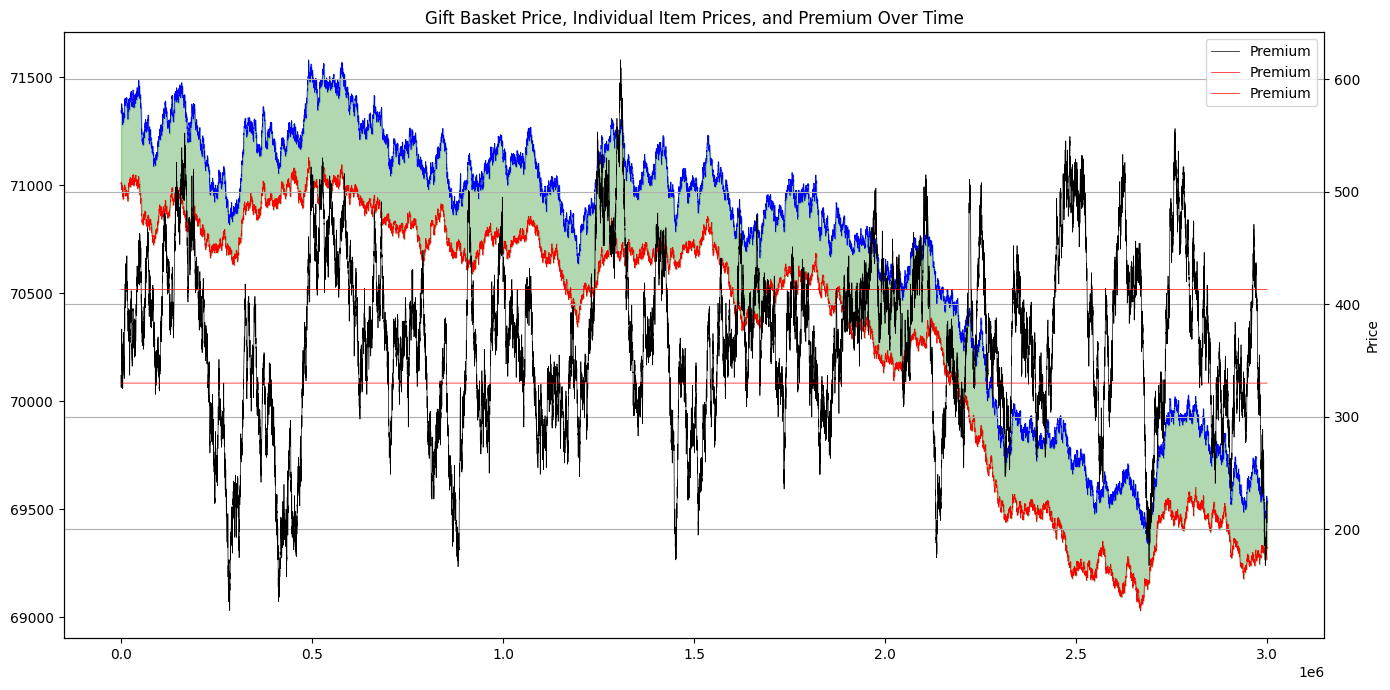

In [58]:
# Plotting the graph with the premium
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()

ax1.plot(plot_data['adjusted_continuous_timestamp'], plot_data['GIFT_BASKET'], label='Gift Basket Price', color='blue', linewidth=0.5)
ax1.plot(plot_data['adjusted_continuous_timestamp'], plot_data['calculated_price'], label='Calculated Price (6 Strawberries + 4 Chocolates + 1 Rose)', color='red', linewidth=0.5)
ax1.fill_between(plot_data['adjusted_continuous_timestamp'], plot_data['calculated_price'], plot_data['GIFT_BASKET'], color='green', alpha=0.3, label='Premium')
plot_data['threshold'] = 413
plot_data['low_threshold'] = 330
ax2.plot(plot_data['adjusted_continuous_timestamp'], plot_data['GIFT_BASKET'] - plot_data['calculated_price'], label='Premium', color='black', linewidth=0.5)
ax2.plot(plot_data['adjusted_continuous_timestamp'], plot_data["threshold"], label='Premium', color='red', linewidth=0.5)
ax2.plot(plot_data['adjusted_continuous_timestamp'], plot_data["low_threshold"], label='Premium', color='red', linewidth=0.5)

plt.title('Gift Basket Price, Individual Item Prices, and Premium Over Time')
plt.xlabel('Adjusted Continuous Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


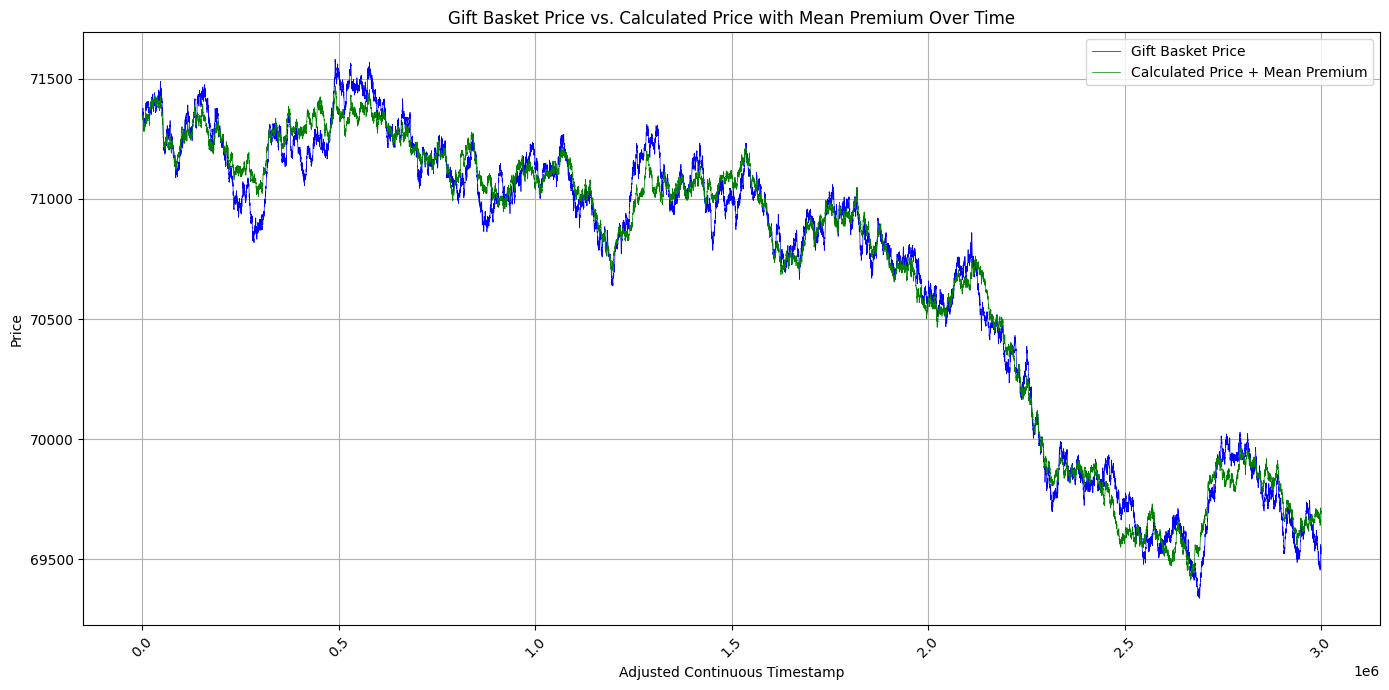

In [48]:
# Adding the mean premium to the calculated price
mean_premium = plot_data['premium'].mean()
plot_data['calculated_price_with_premium'] = plot_data['calculated_price'] + plot_data['premium'].rolling(window=10000, min_periods=1).mean()
# Plotting the adjusted calculated price with premium vs the gift basket price
plt.figure(figsize=(14, 7))
plt.plot(plot_data['adjusted_continuous_timestamp'], plot_data['GIFT_BASKET'], label='Gift Basket Price', color='blue', linewidth=0.5)
plt.plot(plot_data['adjusted_continuous_timestamp'], plot_data['calculated_price_with_premium'], label='Calculated Price + Mean Premium', color='green', linewidth=0.5)

plt.title('Gift Basket Price vs. Calculated Price with Mean Premium Over Time')
plt.xlabel('Adjusted Continuous Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


<Axes: title={'center': 'Rolling Mean of Gift Basket Price and Calculated Price Over Time'}>

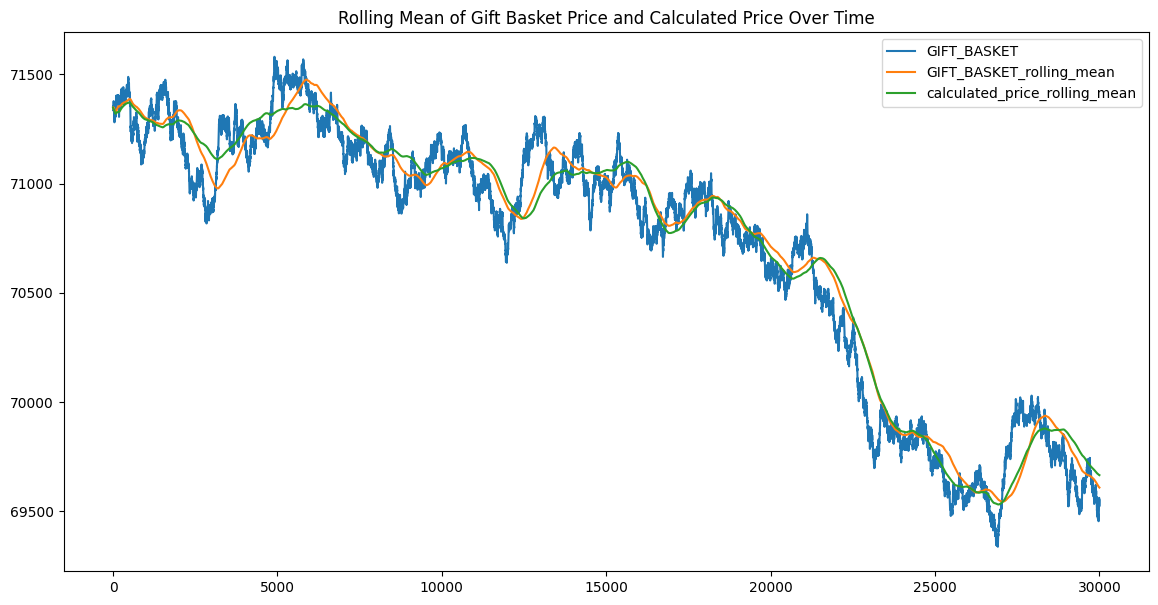

In [56]:
plot_data['GIFT_BASKET_rolling_mean'] = plot_data['GIFT_BASKET'].rolling(window=1000, min_periods=1).mean()
plot_data['calculated_price_rolling_mean'] = plot_data['calculated_price_with_premium'].rolling(window=1000, min_periods=1).mean()

plot_data[['GIFT_BASKET', 'GIFT_BASKET_rolling_mean', 'calculated_price_rolling_mean']].plot(figsize=(14, 7), title='Rolling Mean of Gift Basket Price and Calculated Price Over Time')